In [1]:
from oggm import utils
import geopandas as gpd
from oggm import cfg
from oggm import tasks, utils, workflow, graphics, DEFAULT_BASE_URL, global_task
import xarray as xr
import matplotlib.pyplot as plt
from oggm.global_tasks import compile_fixed_geometry_mass_balance

In [2]:
# Initialize OGGM and set up the default run parameters
cfg.initialize(logging_level='WARNING')

# Local working directory (where OGGM will write its output)
# WORKING_DIR = utils.gettempdir('OGGM_distr4')
cfg.PATHS['working_dir'] = utils.get_temp_dir('OGGM_distributed', reset=True)

rgi_ids = ['RGI60-15.03473']  # This is Aletsch
gdir = workflow.init_glacier_directories(rgi_ids, prepro_base_url=DEFAULT_BASE_URL, from_prepro_level=4, prepro_border=80)[0]

2024-04-29 17:40:21: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-04-29 17:40:21: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-04-29 17:40:21: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-04-29 17:40:22: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-04-29 17:40:22: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers


In [7]:
infos = utils.compile_glacier_statistics(gdir)

2024-04-29 17:06:58: oggm.utils: Applying global task compile_glacier_statistics on 1 glaciers
2024-04-29 17:06:58: oggm.workflow: Execute entity tasks [glacier_statistics] on 1 glaciers


In [8]:
infos

,rgi_region,rgi_subregion,name,cenlon,cenlat,rgi_area_km2,rgi_year,glacier_type,terminus_type,is_tidewater,...,melt_f,prcp_fac,temp_bias,reference_mb,reference_mb_err,reference_period,temp_default_gradient,temp_all_solid,temp_all_liq,temp_melt
rgi_id,,,,,,,,,,,,,,,,,,,,,
RGI60-15.03473,15,15-02,,86.715912,28.089468,61.054,2000,Glacier,Land-terminating,False,...,2.69066,5.31651,4.233412,-451.2,99.1,2000-01-01_2020-01-01,-0.0065,0.0,2.0,-1.0


In [38]:
gdir

<oggm.GlacierDirectory>
  RGI id: RGI60-15.03473
  Region: 15: South Asia East
  Subregion: 15-02: E Himalaya                      
  Glacier type: Glacier
  Terminus type: Land-terminating
  Status: Glacier or ice cap
  Area: 61.054 km2
  Lon, Lat: (86.715911865, 28.089468002)
  Grid (nx, ny): (247, 322)
  Grid (dx, dy): (119.0, -119.0)

# Compile fixed geometry mass balance

In [18]:
donnees = compile_fixed_geometry_mass_balance(gdir)

2024-04-29 17:18:04: oggm.utils: Applying global task compile_fixed_geometry_mass_balance on 1 glaciers
2024-04-29 17:18:04: oggm.workflow: Execute entity tasks [fixed_geometry_mass_balance] on 1 glaciers


In [30]:
donnees["RGI60-15.03473"]

1901    -538.027728
1902    2184.639466
1903    -326.680554
1904     331.863793
1905    1657.218781
           ...     
2015    -931.192191
2016    -577.236115
2017    -432.069189
2018    -213.081880
2019    -599.827167
Name: RGI60-15.03473, Length: 119, dtype: float64

2024-04-29 17:24:36: oggm.utils: Applying global task compile_fixed_geometry_mass_balance on 1 glaciers
2024-04-29 17:24:36: oggm.workflow: Execute entity tasks [fixed_geometry_mass_balance] on 1 glaciers


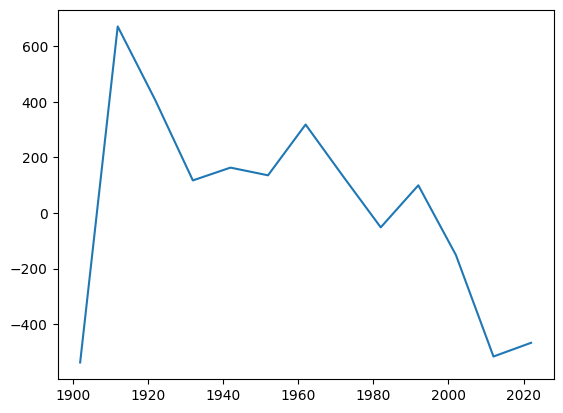

In [39]:
import pandas as pd
donnees = compile_fixed_geometry_mass_balance(gdir)
# Créer un DataFrame à partir des données fournies
donnees = pd.DataFrame({
    'annee': [i for i in range(1901, 2020)],
    'donnees': donnees["RGI60-15.03473"]
})

# Convertir la colonne 'annee' en type de données datetime
donnees['annee'] = pd.to_datetime(donnees['annee'], format='%Y')

# Définir la colonne 'annee' comme index
donnees = donnees.set_index('annee')

# Calculer la moyenne sur une période de 5 ans
moyenne_5_ans = donnees['donnees'].resample('10Y').mean()

# Afficher le DataFrame avec la moyenne tous les 5 ans
plt.plot(moyenne_5_ans)

In [40]:
print(moyenne_5_ans)

annee
1901-12-31   -538.027728
1911-12-31    670.840712
1921-12-31    405.686663
1931-12-31    117.011530
1941-12-31    163.044083
1951-12-31    135.376783
1961-12-31    318.036316
1971-12-31    131.436680
1981-12-31    -51.906509
1991-12-31     99.398862
2001-12-31   -151.323860
2011-12-31   -516.570966
2021-12-31   -467.235476
Freq: 10A-DEC, Name: donnees, dtype: float64


In [19]:
import pandas as pd

In [23]:
donnees = pd.to_datetime(donnees["year"])  # Convertir la colonne 'annee' en type de données datetime si elle ne l'est pas déjà

moyenne_5_ans = donnees.resample('5Y').mean()  # Calculer la moyenne sur une période de 5 ans


KeyError: 'year'

In [16]:
print(res2)

      RGI60-15.03473
1901     -538.027728
1902     2184.639466
1903     -326.680554
1904      331.863793
1905     1657.218781
...              ...
2015     -931.192191
2016     -577.236115
2017     -432.069189
2018     -213.081880
2019     -599.827167

[119 rows x 1 columns]


# Compute downstream bedshape

In [15]:
from oggm.global_tasks import compile_ela

In [16]:
donnees = compile_ela(gdir, ys=1901, ye=2019)

2024-04-29 17:42:59: oggm.utils: Applying global task compile_ela on 1 glaciers
2024-04-29 17:42:59: oggm.workflow: Execute entity tasks [compute_ela] on 1 glaciers


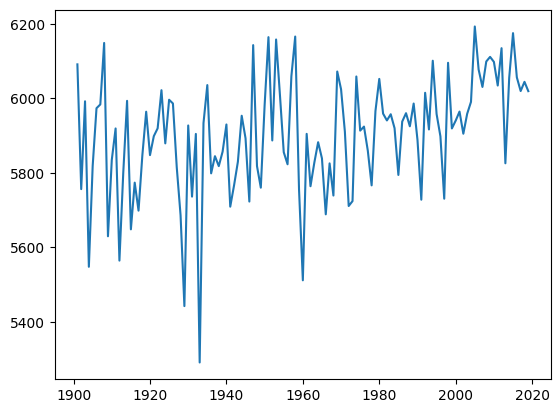

In [17]:
plt.plot(donnees)

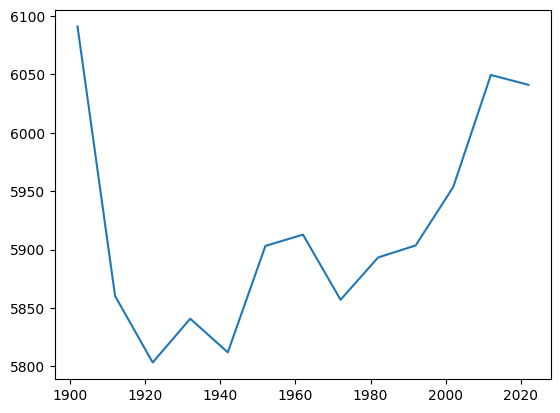

In [18]:
import pandas as pd
# Créer un DataFrame à partir des données fournies
donnees = pd.DataFrame({
    'annee': [i for i in range(1901, 2020)],
    'donnees': donnees["RGI60-15.03473"]
})

# Convertir la colonne 'annee' en type de données datetime
donnees['annee'] = pd.to_datetime(donnees['annee'], format='%Y')

# Définir la colonne 'annee' comme index
donnees = donnees.set_index('annee')

# Calculer la moyenne sur une période de 5 ans
moyenne_5_ans = donnees['donnees'].resample('10Y').mean()

# Afficher le DataFrame avec la moyenne tous les 5 ans
plt.plot(moyenne_5_ans)